# **Data analysis project: E-Commerce**

**Public Dataset**
- **Nama:** Normatul Uyun
- **Email:** M200B4KX3396@bangkit.academy
- **ID Dicoding:** normatuluyun

## **Bussines Question**

- Bussines Question 1: How does the return rate relate to the total number of orders? Is there a significant correlation between these two factors?
- Bussines Question 2: Which city has the most total sales volume?

##Import Data & Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

##Data Wrangling

###Data Gathering

In [ ]:
# Load the datasets
products_df = pd.read_csv('products_dataset.csv')
order_items_df = pd.read_csv('order_items_dataset.csv')
reviews_df = pd.read_csv('order_reviews_dataset.csv')

# Merge order_items with products based on 'product_id'
merged_df = pd.merge(order_items_df[['order_id', 'product_id', 'seller_id']],
                     products_df[['product_id', 'product_category_name']],
                     on='product_id', how='inner')

# Merge the result with reviews based on 'order_id'
data_with_reviews_df = pd.merge(merged_df,
                                 reviews_df[['order_id', 'review_score']],
                                 on='order_id', how='inner')

# Display the resulting merged DataFrame
print(data_with_reviews_df.head())

                           order_id                        product_id  \
0  00010242fe8c5a6d1ba2dd792cb16214  4244733e06e7ecb4970a6e2683c13e61   
1  130898c0987d1801452a8ed92a670612  4244733e06e7ecb4970a6e2683c13e61   
2  532ed5e14e24ae1f0d735b91524b98b9  4244733e06e7ecb4970a6e2683c13e61   
3  6f8c31653edb8c83e1a739408b5ff750  4244733e06e7ecb4970a6e2683c13e61   
4  7d19f4ef4d04461989632411b7e588b9  4244733e06e7ecb4970a6e2683c13e61   

                          seller_id product_category_name  review_score  
0  48436dade18ac8b2bce089ec2a041202            cool_stuff             5  
1  48436dade18ac8b2bce089ec2a041202            cool_stuff             5  
2  48436dade18ac8b2bce089ec2a041202            cool_stuff             4  
3  48436dade18ac8b2bce089ec2a041202            cool_stuff             5  
4  48436dade18ac8b2bce089ec2a041202            cool_stuff             5  


In [ ]:
# Load the datasets
sellers_df = pd.read_csv('sellers_dataset.csv')
order_items_df = pd.read_csv('order_items_dataset.csv')

# Merge order_items with sellers based on 'seller_id'
merged_sellers_df = pd.merge(order_items_df[['order_item_id', 'seller_id']],
                              sellers_df[['seller_id', 'seller_city', 'seller_state']],
                              on='seller_id', how='inner')

# Display the resulting merged DataFrame
print(merged_sellers_df.head())

   order_item_id                         seller_id    seller_city seller_state
0              1  48436dade18ac8b2bce089ec2a041202  volta redonda           SP
1              1  48436dade18ac8b2bce089ec2a041202  volta redonda           SP
2              1  48436dade18ac8b2bce089ec2a041202  volta redonda           SP
3              1  48436dade18ac8b2bce089ec2a041202  volta redonda           SP
4              1  48436dade18ac8b2bce089ec2a041202  volta redonda           SP


##Insight
- **Bussines Question 1: Which product category has the highest rate of return?**
Prepare data to analyze which product category has the highest return rate. The data used are products_dataset (product_id column, product_category_name), order_items_dataset (order_id column, product_id), and order_reviews_dataset (order_id column, review_scores). The three datasets are created into one new dataframe, namely data_with_reviews_df.

- **Bussines Question 2: Which seller has the highest sales volume?**
Prepare data to analyze which sellers have the highest sales volume. The data used are sellers_dataset (seller_id, seller_city, seller_state columns) and order_items_dataset (order_id, seller_id, price columns). The two datasets are merged into a new dataframe, merged_sellers_df.

### Data Assesing

In [ ]:
data_with_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112372 entries, 0 to 112371
Data columns (total 5 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   order_id               112372 non-null  object
 1   product_id             112372 non-null  object
 2   seller_id              112372 non-null  object
 3   product_category_name  110774 non-null  object
 4   review_score           112372 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 4.3+ MB


In [ ]:
merged_sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   order_item_id  112650 non-null  int64 
 1   seller_id      112650 non-null  object
 2   seller_city    112650 non-null  object
 3   seller_state   112650 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.4+ MB


**Insight**

**Bussines Question 1**
- Data types for all columns are correct
- Order_Id, product_Id, seller_Id and review_score columns have complete data with no missing values.
- There are 1598 missing values in product_category_name column.

**Business Question 2**
- Data types for all columns are correct
- There are no missing values for all columns
  
  


In [ ]:
# Check for missing values
data_with_reviews_df.isna().sum()


,0
order_id,0
product_id,0
seller_id,0
product_category_name,1598
review_score,0


In [ ]:
# Check missing values
merged_sellers_df.isna().sum()

,0
order_item_id,0
seller_id,0
seller_city,0
seller_state,0


In [ ]:
# Check statistik desciptive
data_with_reviews_df.describe()

,review_score
count,112372.000000
mean,4.032473
std,1.387849
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
# Check statistik desciptive
merged_sellers_df.describe()

,order_item_id
count,112650.000000
mean,1.197834
std,0.705124
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,21.000000


In [ ]:
# Show data duplikasi
print("Jumlah duplikasi: ", data_with_reviews_df.duplicated().sum())

data_with_reviews_df.describe()

Jumlah duplikasi:  0


,review_score
count,100403.000000
mean,4.077757
std,1.352032
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


**Insight Bussines Question 1**
- There are 1598 out of 112372 data that are missing values in the product_category_name column. In this case, the missing value is about 1.42% and falls into the small category. For this reason, rows containing missing values were deleted to avoid potential bias from the data artificially.
- The results of the descriptive statistical analysis are appropriate.
- There are 10517 duplicate data in data_with_reviews

###Data Cleaning

**For Bussines Question 1**

In [ ]:
# Check missing value
data_with_reviews_df[data_with_reviews_df.product_category_name.isna()]

,order_id,product_id,seller_id,product_category_name,review_score


In [ ]:
# Remove missing value in product_category_name colum
data_with_reviews_df.dropna(subset=['product_category_name'], inplace=True)

In [ ]:
# Remove data duplicate
data_with_reviews_df.drop_duplicates(inplace=True)

In [ ]:
# Check data duplicate
print("Jumlah duplikasi: ", data_with_reviews_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
# Calculate Q1 and Q3
Q1 = np.percentile(data_with_reviews_df['review_score'], 25, interpolation='midpoint')
Q3 = np.percentile(data_with_reviews_df['review_score'], 75, interpolation='midpoint')

# Calculate IQR
IQR = Q3 - Q1

# Determine lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data_with_reviews_df[(data_with_reviews_df['review_score'] < lower_bound) | (data_with_reviews_df['review_score'] > upper_bound)]

# Print the results
print('Nilai batas atas:', upper_bound)
print('Nilai batas bawah:', lower_bound)
print('Nilai unik:', outliers['review_score'].unique())
print('Jumlah outlier:', len(outliers))

Nilai batas atas: 6.5
Nilai batas bawah: 2.5
Nilai unik: [1 2]
Jumlah outlier: 14952


**For Bussines Question 2**

In [ ]:
#Check data duplicate
print("Jumlah duplikasi: ", merged_sellers_df.duplicated().sum())

Jumlah duplikasi:  106283


In [ ]:
#Remove data duplicate
merged_sellers_df.drop_duplicates(inplace=True)

In [ ]:
#Check data duplicate
print("Jumlah duplikasi: ", merged_sellers_df.duplicated().sum())

Jumlah duplikasi:  0


##Exploratory Data Analyst

**For Bussines Questin 1**

In [ ]:
# Define returns as reviews with scores 1 or 2
returns_df = data_with_reviews_df[data_with_reviews_df['review_score'] <= 2]

# Group by product category and calculate total orders and return orders
category_returns = returns_df.groupby('product_category_name').size().reset_index(name='return_count')
category_total_orders = data_with_reviews_df.groupby('product_category_name').size().reset_index(name='total_orders')

# Merge the return counts with total orders
category_return_rates = pd.merge(category_total_orders, category_returns, on='product_category_name', how='left')
category_return_rates['return_count'].fillna(0, inplace=True)  # Handle categories with no returns

# Calculate the return rate
category_return_rates['return_rate'] = category_return_rates['return_count'] / category_return_rates['total_orders']

# Sort categories by return rate in descending order
category_return_rates = category_return_rates.sort_values(by='return_rate', ascending=False)

# Display the product categories with the highest return rates
print(category_return_rates)

                            product_category_name  total_orders  return_count  \
67                             seguros_e_servicos             2           1.0   
60                                       pc_gamer             8           3.0   
65  portateis_cozinha_e_preparadores_de_alimentos            14           4.0   
38                        fashion_roupa_masculina           122          34.0   
55                              moveis_escritorio          1296         304.0   
..                                            ...           ...           ...   
48                         livros_interesse_geral           526          46.0   
22             construcao_ferramentas_ferramentas            94           8.0   
41                                         flores            28           2.0   
2                               alimentos_bebidas           234          13.0   
17                              cds_dvds_musicais            12           0.0   

    return_rate  
67     0.

**Insight**
- The products that have the highest return rates are seguros_e_servicos, pc_gamer and portateis_cozinha_e_preparadores_de_alimentos with respective return rates of (0.5, 0.37 and 0.28). The product moveis_escritorio seems to sell a lot and has many reviews, but the return rate value is relatively small.

**For Bussines Question 2**


In [ ]:
# Calculate sales volume (number of order_item_id) for each city (seller_city)
sales_volume_per_city = merged_sellers_df.groupby('seller_city').agg({'order_item_id': 'count'}).reset_index()

# Rename the column to make it more informative
sales_volume_per_city.rename(columns={'order_item_id': 'sales_volume'}, inplace=True)

# Sort by the highest sales volume
top_cities = sales_volume_per_city.sort_values(by='sales_volume', ascending=False)

# Display the results
print(top_cities)  # Display the top 10 cities with the highest sales volume

        seller_city  sales_volume
517       sao paulo          1498
159        curitiba           236
450  rio de janeiro           186
227        ibitinga           147
220       guarulhos           139
..              ...           ...
319     mandirituba             1
316          manaus             1
311        macatuba             1
309        luziania             1
610           xaxim             1

[611 rows x 2 columns]


**Insight**
- The cities with the highest total sales volumeare Sao Paulo, Curitiba and Rio de Janeiro(1498, 236 and 186)

## Visualization & Explanatory Analysis

**For Bussines Question 1**

**Total Order Visualization**

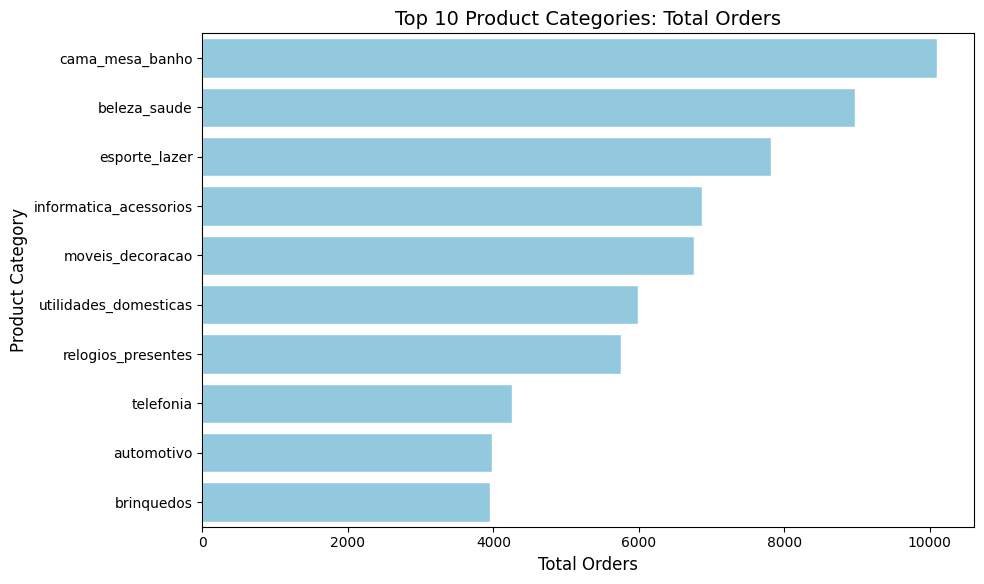

In [ ]:
# Sort data by total orders in descending order and limit to top 10
top10_category_return_rates = category_return_rates.sort_values(by='total_orders', ascending=False).head(10)

# Create a figure
fig, ax1 = plt.subplots(figsize=(10, 6))

# Set background style using seaborn
sns.set(style="whitegrid")

# Plot the total orders as a bar chart
sns.barplot(y='product_category_name', x='total_orders', data=top10_category_return_rates, ax=ax1, color='skyblue')

# Set labels with black font color
ax1.set_ylabel('Product Category', fontsize=12, color='black')
ax1.set_xlabel('Total Orders', fontsize=12, color='black')

# Title
plt.title('Top 10 Product Categories: Total Orders', fontsize=14)

# Adjust layout to make space for labels
plt.tight_layout()

# Display the plot
plt.show()


**Return Rate Visualization**

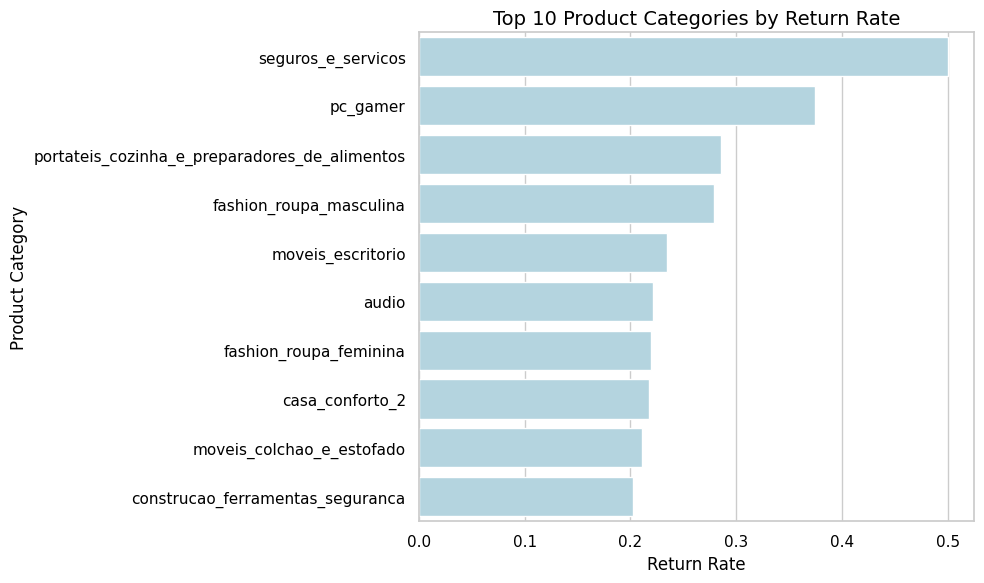

In [ ]:
# Sort data by return rate in descending order and limit to top 10 for better readability
top10_category_return_rates = category_return_rates.sort_values(by='return_rate', ascending=False).head(10)

# Create a figure for the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Set background style using seaborn
sns.set(style="whitegrid")

# Plot the return rate as a bar chart
sns.barplot(y='product_category_name', x='return_rate', data=top10_category_return_rates, ax=ax, color='lightblue')

# Set labels and title
ax.set_xlabel('Return Rate', fontsize=12, color='black')
ax.set_ylabel('Product Category', fontsize=12, color='black')
plt.title('Top 10 Product Categories by Return Rate', fontsize=14, color='black')

# Customize label colors
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

# Adjust layout to make space for labels
plt.tight_layout()

# Display the plot
plt.show()




**Relationship between Total Orders and Return Rate**

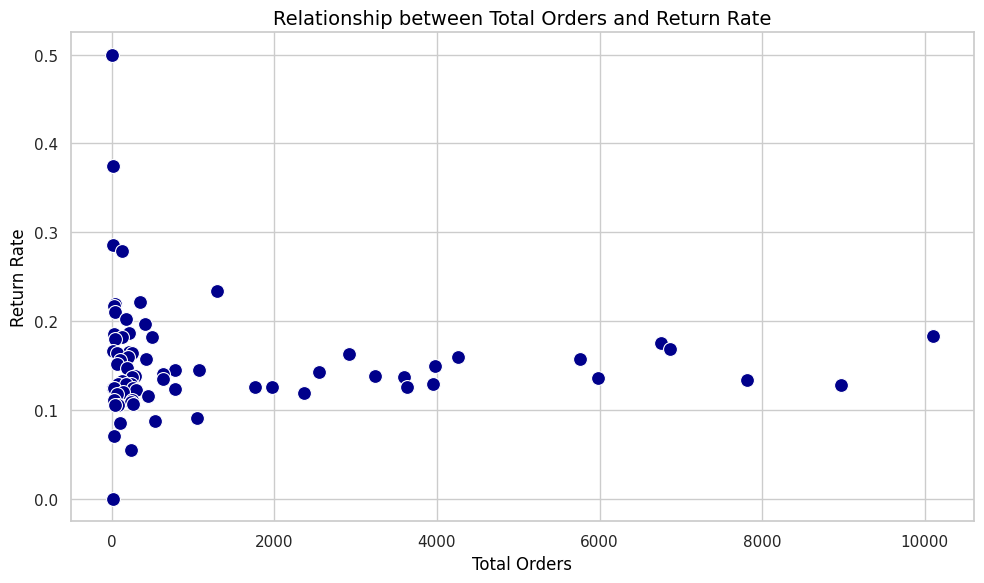

In [ ]:
# Create a figure
fig, ax = plt.subplots(figsize=(10, 6))

# Set background style using seaborn
sns.set(style="whitegrid")

# Plot the scatter plot to show the relationship between return rate and total orders
sns.scatterplot(x='total_orders', y='return_rate', data=category_return_rates, color='darkblue', s=100, ax=ax)

# Set labels with black color
ax.set_xlabel('Total Orders', fontsize=12, color='black')
ax.set_ylabel('Return Rate', fontsize=12, color='black')

# Title
plt.title('Relationship between Total Orders and Return Rate', fontsize=14, color='black')

# Adjust layout to make space for labels
plt.tight_layout()

# Display the plot
plt.show()


**Insight**
- This graph does not show a clear trend between total orders and the rate of return. That is, an increase in the number of orders is not always followed by an increase or decrease in the rate of return.
-The product return rate seems to vary quite a bit among various order quantities. This suggests that other factors besides the order quantity may have more influence on the return rate.
- There is no clear straight line that can connect the data points, which indicates the absence of a strong linear correlation between the two variables.

**For Bussines Question 2**

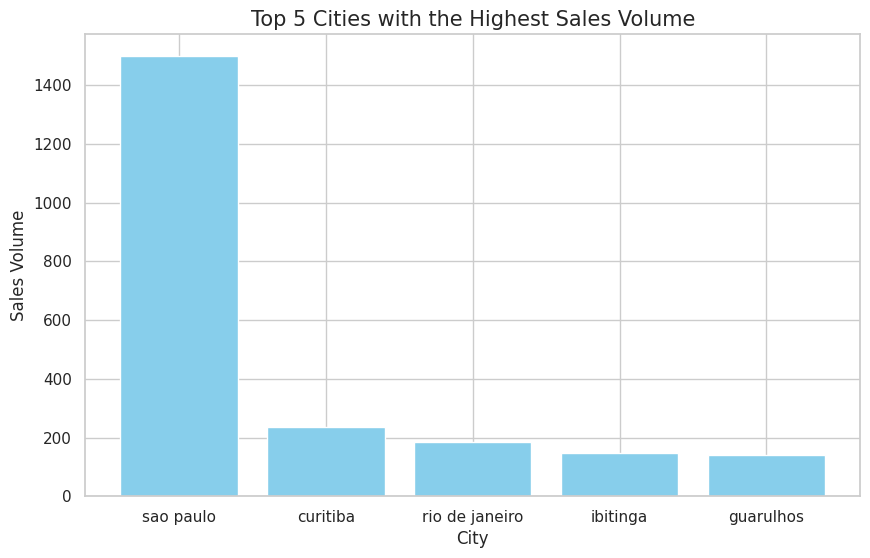

In [ ]:
# Select the top 5 cities with the highest sales volume
top_5_cities = top_cities.head(5)

# Create a bar plot
plt.figure(figsize=(10,6))
plt.bar(top_5_cities['seller_city'], top_5_cities['sales_volume'], color='skyblue')

# Add labels and title
plt.xlabel('City', fontsize=12)
plt.ylabel('Sales Volume', fontsize=12)
plt.title('Top 5 Cities with the Highest Sales Volume', fontsize=15)

# Display the plot
plt.show()

##Insight
- Sao Paulo clearly dominates in terms of sales volume, indicating high sales activity from the city.
Other cities such as Curitiba and Rio de Janeiro are in second and third place, but with much lower sales volumes than Sao Paulo.
Cities like Ibitinga and Guarulhos are at the bottom of the top 5 cities with the highest sales volume.

##**Conclution**

**Bussines Question 1**
1. The products that have the highest return rates are seguros_e_servicos, pc_gamer and portateis_cozinha_e_preparadores_de_alimentos with respective return rates of (0.5, 0.37 and 0.28). with total orders (2,8 and 14)
2. Despite the high return rates for certain products, there's no clear linear relationship between return rate and total orders. This suggests that other factors besides order quantity play a more significant role in product returns.
3. The return rate seems to vary greatly among different products, indicating that product characteristics (e.g., quality, complexity, customer satisfaction) are more influential than total order in determining returns.

**Bussines Question 2**
- In general, the higher the sales volume a city generates, the more likely it is to have many active sellers contributing to total sales. However, the graph also shows that the distribution of sales volume across cities is not always proportional, as evidenced by the significant difference between Sao Paulo and other cities. This shows that there are cities such as Curitiba and Rio de Janeiro that, although large, generate lower sales volumes than expected when compared to Sao Paulo. In addition, cities such as Ibitinga and Guarulhos show significantly lower sales volumes, indicating potential room for growth in these areas.
